In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
df = pd.read_csv('Dummy_Month.csv')
df.head()

,Unnamed: 0,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1,1002,Present,0,0,Wednesday,2021-08-04
2,2,1003,Present,0,0,Wednesday,2021-08-04
3,3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,4,1005,Present,0,0,Wednesday,2021-08-04


In [3]:
#The amount of observations (rows) and characteristics(columns) in a dataset
print ('The Total Rows in the dataset = ' + str(df.shape[0]))
print ('The Total Columns in the dataset = ' + str(df.shape[1]))

The Total Rows in the dataset = 13440
The Total Columns in the dataset = 7


In [4]:
Bay_ID = (df['Bay_id'] == 1001)
Multiple_Bay_ID = (df['Bay_id'].isin([1001, 1003, 1005]))
Parking_Status_Present = (df['Status'] == 'Present')
Parking_Status_Unoccupied = (df['Status'] == 'Unoccupied')
Day_Of_Week = (df['DayOfWeek'] == 'Wednesday')
Date = (df['Date'] == '2021-08-04')
Hour = (df['Hour'] == 10)

In [9]:
Unav_CountStatus = df.loc[Bay_ID & Parking_Status_Present].groupby('Status').DayOfWeek.value_counts().unstack(0)
Unav_CountStatus = Unav_CountStatus.reset_index()
Unav_CountStatus['Present'] = (Unav_CountStatus['Present'] / 4).round(0)
Unav_CountStatus.columns = ['Day', 'Mean_Parking_Occupied']
Unav_CountStatus = Unav_CountStatus.set_index('Day').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

CountStatus = df.loc[Bay_ID & Parking_Status_Unoccupied].groupby('Status').DayOfWeek.value_counts().unstack(0)
CountStatus = CountStatus.reset_index()
CountStatus['Unoccupied'] = (CountStatus['Unoccupied'] / 4).round(0)
CountStatus.columns = ['Day', 'Mean_Parking_Unoccupied']
CountStatus = CountStatus.set_index('Day').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

Parkingdf = pd.merge(CountStatus, Unav_CountStatus, on=['Day'])
Parkingdf = pd.DataFrame(Parkingdf)

In [10]:
Parkingdf = Parkingdf.eval('Sum_Parking = Mean_Parking_Unoccupied + Mean_Parking_Occupied')
Parking_SUM = Parkingdf.iloc[0,3]
Parking_SUM = int(round(Parking_SUM))
Parkingdf

,Day,Mean_Parking_Unoccupied,Mean_Parking_Occupied,Sum_Parking
0,Monday,44.0,52.0,96.0
1,Tuesday,43.0,53.0,96.0
2,Wednesday,49.0,47.0,96.0
3,Thursday,46.0,50.0,96.0
4,Friday,50.0,46.0,96.0
5,Saturday,54.0,42.0,96.0
6,Sunday,53.0,43.0,96.0


In [7]:
Currentday_Count = df.loc[Bay_ID & Parking_Status_Present & Date].groupby('Status').DayOfWeek.value_counts().unstack(0)
Currentday_Count = Currentday_Count.reset_index()
Currentday_Count.columns = ['Day', 'Parking_Occupied']

Day_of_Choice = Currentday_Count.iloc[0,0]

Currentday_Count

,Day,Parking_Occupied
0,Wednesday,44


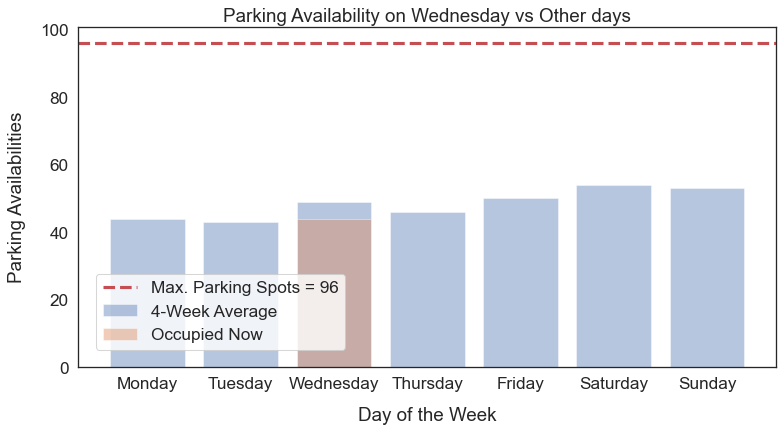

In [8]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=75)
sns.set_style("white")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.xlabel("Day of the Week", labelpad=14)
plt.title(f"Parking Availability on {Day_of_Choice} vs Other days", y=1)

plt.bar(Parkingdf['Day'], Parkingdf['Mean_Parking_Unoccupied'],alpha=0.4 , label="4-Week Average")
plt.bar(Currentday_Count['Day'], Currentday_Count['Parking_Occupied'],alpha=0.4, label="Occupied Now")

plt.axhline(y=Parking_SUM, color='r', linestyle = 'dashed', linewidth=3, label=f"Max. Parking Spots = {Parking_SUM}")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()